# Compute Drawdowns

In [76]:
import pandas as pd
import numpy as np

In [77]:
me_m = pd.read_csv('downloads/Portfolios_Formed_on_ME_monthly_EW.csv',
                  header=0, index_col=0, parse_dates=False, na_values=-99.99)

In [78]:
me_m

,<= 0,Lo 30,Med 40,Hi 30,Lo 20,Qnt 2,Qnt 3,Qnt 4,Hi 20,Lo 10,Dec 2,Dec 3,Dec 4,Dec 5,Dec 6,Dec 7,Dec 8,Dec 9,Hi 10
192607,NaN,-0.43,1.52,2.68,-0.57,0.59,1.60,1.47,3.33,-1.45,0.29,-0.15,1.33,1.24,1.98,1.55,1.38,3.38,3.29
192608,NaN,3.90,3.04,2.09,3.84,3.59,3.71,1.61,2.33,5.12,2.59,4.03,3.15,2.72,4.72,1.60,1.63,0.98,3.70
192609,NaN,-1.08,-0.54,0.16,-0.48,-1.40,0.00,-0.50,-0.09,0.93,-1.87,-2.27,-0.53,0.07,-0.07,-1.64,0.64,-0.86,0.67
192610,NaN,-3.32,-3.52,-3.06,-3.29,-4.10,-2.89,-3.36,-2.95,-4.84,-1.77,-3.36,-4.83,-2.98,-2.80,-3.45,-3.27,-3.47,-2.43
192611,NaN,-0.46,3.82,3.09,-0.55,2.18,3.41,3.39,3.16,-0.78,-0.32,-0.29,4.65,3.24,3.57,3.82,2.95,3.61,2.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
201808,NaN,3.47,4.04,2.87,3.09,5.05,3.90,3.54,2.49,2.41,5.07,5.30,4.70,3.02,5.01,3.50,3.58,2.65,2.34
201809,NaN,-2.24,-1.85,0.08,-2.04,-2.38,-2.48,-0.74,0.19,-1.68,-3.08,-3.22,-1.23,-2.65,-2.27,-1.31,-0.12,-0.51,0.87
201810,NaN,-10.76,-10.88,-7.63,-10.52,-11.74,-10.55,-9.45,-7.41,-10.02,-11.98,-11.89,-11.52,-11.58,-9.23,-10.74,-8.04,-8.28,-6.57
201811,NaN,-2.08,2.18,2.19,-2.78,1.69,1.46,2.62,2.49,-3.65,-0.23,1.23,2.30,1.74,1.11,3.54,1.63,2.45,2.53


In [79]:
rets = me_m[['Lo 20', 'Hi 20']]

rets

,Lo 20,Hi 20
192607,-0.57,3.33
192608,3.84,2.33
192609,-0.48,-0.09
192610,-3.29,-2.95
192611,-0.55,3.16
...,...,...
201808,3.09,2.49
201809,-2.04,0.19
201810,-10.52,-7.41
201811,-2.78,2.49


In [80]:
rets.columns = ['SmallCap', 'LargeCap']
rets

,SmallCap,LargeCap
192607,-0.57,3.33
192608,3.84,2.33
192609,-0.48,-0.09
192610,-3.29,-2.95
192611,-0.55,3.16
...,...,...
201808,3.09,2.49
201809,-2.04,0.19
201810,-10.52,-7.41
201811,-2.78,2.49


In [81]:
rets = rets/100
rets

,SmallCap,LargeCap
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316
...,...,...
201808,0.0309,0.0249
201809,-0.0204,0.0019
201810,-0.1052,-0.0741
201811,-0.0278,0.0249


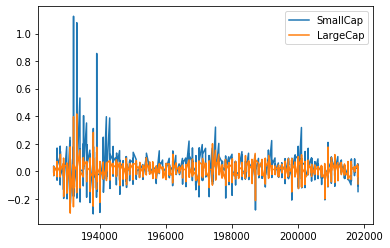

In [82]:
rets.plot.line()

In [83]:
rets.head()

,SmallCap,LargeCap
192607,-0.0057,0.0333
192608,0.0384,0.0233
192609,-0.0048,-0.0009
192610,-0.0329,-0.0295
192611,-0.0055,0.0316


In [84]:
rets.index

Int64Index([192607, 192608, 192609, 192610, 192611, 192612, 192701, 192702,
            192703, 192704,
            ...
            201803, 201804, 201805, 201806, 201807, 201808, 201809, 201810,
            201811, 201812],
           dtype='int64', length=1110)

In [85]:
rets.index = pd.to_datetime(rets.index, format='%Y%m')

In [86]:
rets.head()

,SmallCap,LargeCap
1926-07-01,-0.0057,0.0333
1926-08-01,0.0384,0.0233
1926-09-01,-0.0048,-0.0009
1926-10-01,-0.0329,-0.0295
1926-11-01,-0.0055,0.0316


In [87]:
rets.index

DatetimeIndex(['1926-07-01', '1926-08-01', '1926-09-01', '1926-10-01',
               '1926-11-01', '1926-12-01', '1927-01-01', '1927-02-01',
               '1927-03-01', '1927-04-01',
               ...
               '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01',
               '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01',
               '2018-11-01', '2018-12-01'],
              dtype='datetime64[ns]', length=1110, freq=None)

In [88]:
rets.index = rets.index.to_period('M')

In [89]:
rets.head()

,SmallCap,LargeCap
1926-07,-0.0057,0.0333
1926-08,0.0384,0.0233
1926-09,-0.0048,-0.0009
1926-10,-0.0329,-0.0295
1926-11,-0.0055,0.0316


In [90]:
rets = rets['1999':"2005"]

In [91]:
rets.index

PeriodIndex(['1999-01', '1999-02', '1999-03', '1999-04', '1999-05', '1999-06',
             '1999-07', '1999-08', '1999-09', '1999-10', '1999-11', '1999-12',
             '2000-01', '2000-02', '2000-03', '2000-04', '2000-05', '2000-06',
             '2000-07', '2000-08', '2000-09', '2000-10', '2000-11', '2000-12',
             '2001-01', '2001-02', '2001-03', '2001-04', '2001-05', '2001-06',
             '2001-07', '2001-08', '2001-09', '2001-10', '2001-11', '2001-12',
             '2002-01', '2002-02', '2002-03', '2002-04', '2002-05', '2002-06',
             '2002-07', '2002-08', '2002-09', '2002-10', '2002-11', '2002-12',
             '2003-01', '2003-02', '2003-03', '2003-04', '2003-05', '2003-06',
             '2003-07', '2003-08', '2003-09', '2003-10', '2003-11', '2003-12',
             '2004-01', '2004-02', '2004-03', '2004-04', '2004-05', '2004-06',
             '2004-07', '2004-08', '2004-09', '2004-10', '2004-11', '2004-12',
             '2005-01', '2005-02', '2005-03', '2005-

In [92]:
rets.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 84 entries, 1999-01 to 2005-12
Freq: M
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   SmallCap  84 non-null     float64
 1   LargeCap  84 non-null     float64
dtypes: float64(2)
memory usage: 2.0 KB


# Compute Drawdowns

1. Compute a welath index
2. Compute previous peaks
3. Compute drawdown - which is the wealth value as a percentage of the previous peak

## 1. Compute a welath index

In [103]:
wealth_index = 1000*(1+rets['LargeCap']).cumprod()
                             

In [104]:
wealth_index.head()

1999-01    1015.300000
1999-02     997.836840
1999-03    1034.557236
1999-04    1104.803672
1999-05    1099.500614
Freq: M, Name: LargeCap, dtype: float64

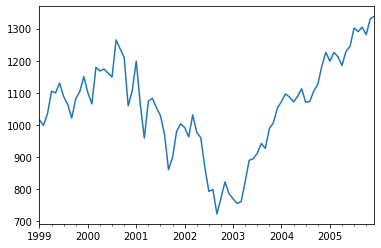

In [105]:
wealth_index.plot.line()

## 2. Compute previous peaks

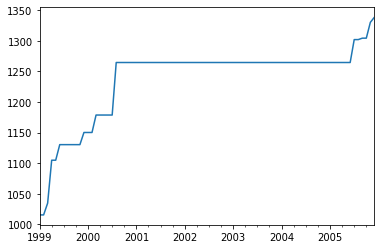

In [106]:
previous_peaks = wealth_index.cummax()
previous_peaks.plot()

## 3. Compute drawdown - which is the wealth value as a percentage of the previous peak

In [107]:
drawdown = (wealth_index - previous_peaks)/previous_peaks

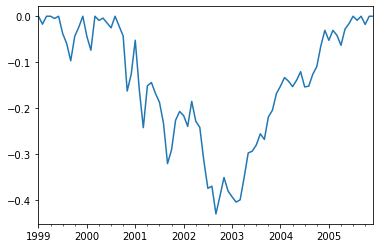

In [108]:
drawdown.plot()


In [109]:
drawdown.head()

1999-01    0.0000
1999-02   -0.0172
1999-03    0.0000
1999-04    0.0000
1999-05   -0.0048
Freq: M, Name: LargeCap, dtype: float64

In [110]:
drawdown.min()

-0.4293391136420622

In [111]:
drawdown['1999':'2005'].min()

-0.4293391136420622

In [112]:
drawdown['1999':'2005'].idxmin()

Period('2002-09', 'M')

In [86]:
drawdown.idxmin()

Period('1932-05', 'M')

In [87]:
def drawdown(return_series: pd.Series):
    """
    Takes a time series of asset returns
    Computes and returns a DataFrame that contains:
    the wealth index
    the previous peaks
    percent drawdons
    """
    wealth_index = 1000*(1+return_series).cumprod()
    previous_peaks = wealth_index.cummax()
    drawdowns = (wealth_index - previous_peaks)/previous_peaks
    return pd.DataFrame({
        "Wealth": wealth_index,
        "Peaks": previous_peaks,
        "Drawdown": drawdowns
    })
    

In [88]:
drawdown(rets["LargeCap"]).head()

,Wealth,Peaks,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [89]:
drawdown(rets['LargeCap'])[['Wealth','Peaks']].head()

,Wealth,Peaks
1926-07,1032.900000,1032.900000
1926-08,1071.117300,1071.117300
1926-09,1078.293786,1078.293786
1926-10,1052.091247,1078.293786
1926-11,1080.497711,1080.497711


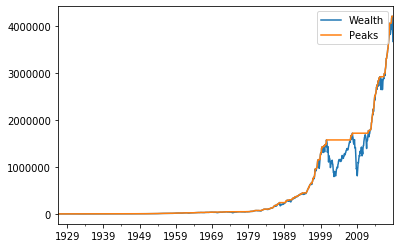

In [90]:
drawdown(rets['LargeCap'])[['Wealth','Peaks']].plot()

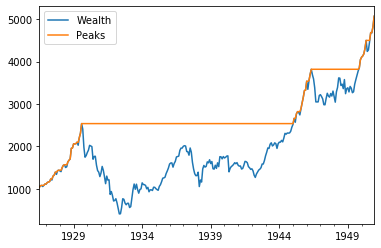

In [91]:
drawdown(rets[:"1950"]['LargeCap'])[['Wealth','Peaks']].plot()

In [92]:
drawdown(rets['LargeCap']).head()

,Wealth,Peaks,Drawdown
1926-07,1032.900000,1032.900000,0.0000
1926-08,1071.117300,1071.117300,0.0000
1926-09,1078.293786,1078.293786,0.0000
1926-10,1052.091247,1078.293786,-0.0243
1926-11,1080.497711,1080.497711,0.0000


In [93]:
drawdown(rets['LargeCap'])["Drawdown"].min()

-0.8400375277943123

In [94]:
drawdown(rets['SmallCap'])["Drawdown"].min()

-0.8330007793945303

In [95]:
drawdown(rets['LargeCap'])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [96]:
drawdown(rets['SmallCap'])["Drawdown"].idxmin()

Period('1932-05', 'M')

In [97]:
drawdown(rets["1940":]['LargeCap'])["Drawdown"].min()

-0.5280945042309305

In [98]:
drawdown(rets["1940":]['SmallCap'])["Drawdown"].min()

-0.7000596091967917

In [99]:
drawdown(rets["1975":]['LargeCap'])["Drawdown"].min()

-0.5280945042309303

In [100]:
drawdown(rets["1975":]['SmallCap'])["Drawdown"].min()

-0.6312068077252386

In [101]:
drawdown(rets["1975":]['LargeCap'])["Drawdown"].idxmin()

Period('2009-02', 'M')

In [102]:
drawdown(rets["1975":]['SmallCap'])["Drawdown"].idxmin()

Period('2009-02', 'M')

In [105]:
def get_ffme_returns():
    """
    Load the Fema-French Dataset for the returns of the Top and Bottom Deciles by MarketCap
    """
    
    me_m = pd.read_csv("DDownload/Portfolios_Formed_on_ME_monthyl_EW.csv",
                      header=0, index_col=0, na_values=-99.99)
    rets =me_m[["Lo 10", 'Hi 10']]
    rets.columns = ['SmallCap','LargeCap']
    rets =rets/100
    rets.index = pd.to_datetime(rets.index, format = "%Y%m").to_period("M")
    return rets
